In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df_index = pd.read_csv('economic_index.csv')

In [3]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [5]:
# dropping unneccessary columns 
df_index.drop(columns= ['Unnamed: 0','year','month'], axis=1,inplace= True)

In [6]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [8]:
# checking null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

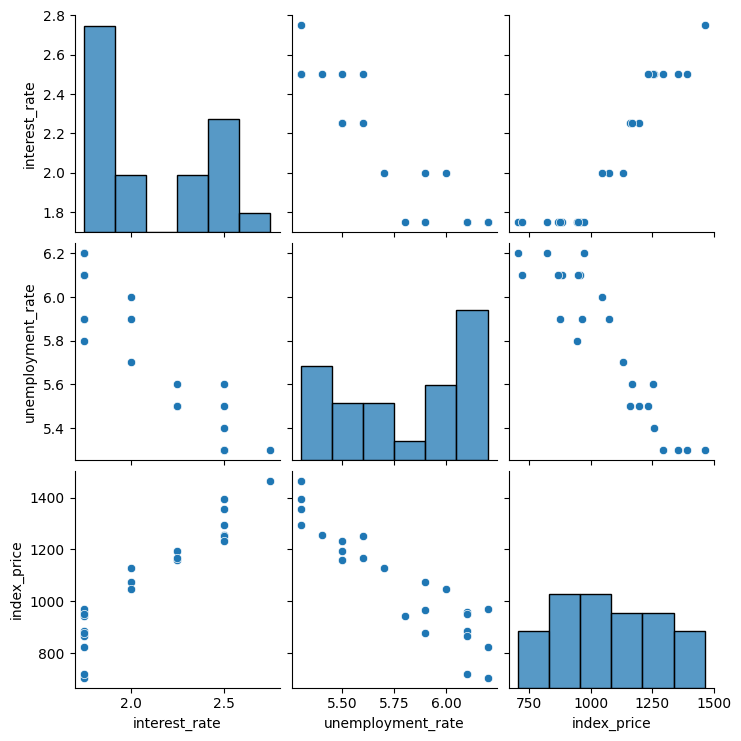

In [10]:
# Visualization
import seaborn as sns
sns.pairplot(df_index)

In [11]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

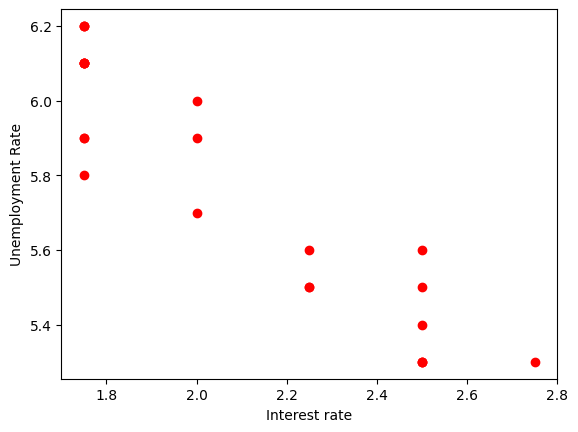

In [13]:
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color = 'red' )
plt.xlabel('Interest rate')
plt.ylabel('Unemployment Rate')

In [21]:
x = df_index[['interest_rate','unemployment_rate']]
y = df_index['index_price']

In [22]:
# train test split 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

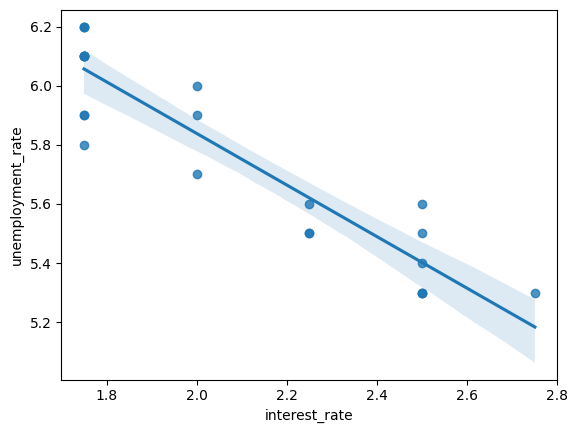

In [24]:
sns.regplot(x=df_index['interest_rate'],y=df_index['unemployment_rate'])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

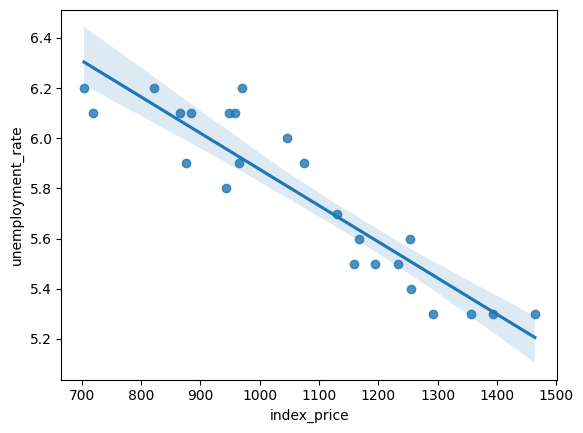

In [26]:
sns.regplot(x=df_index['index_price'],y=df_index['unemployment_rate'])

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [29]:
x_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [32]:
from sklearn.model_selection import cross_val_score

In [34]:
cross = cross_val_score(regression,x_train,y_train,scoring= 'neg_mean_squared_error',cv = 3)

In [36]:
np.mean(cross)

np.float64(-5914.828180162388)

In [37]:
y_pred = regression.predict(x_test)

In [38]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [41]:
# performance metrics 
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [45]:
from sklearn.metrics import r2_score

score = r2_score(y_test,y_pred)
print(score)

# display adjusted R sqaured
adj_r2 = (1 - (1 - score) * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print(adj_r2)

0.7591371539010257
0.5985619231683761


# Assumptions





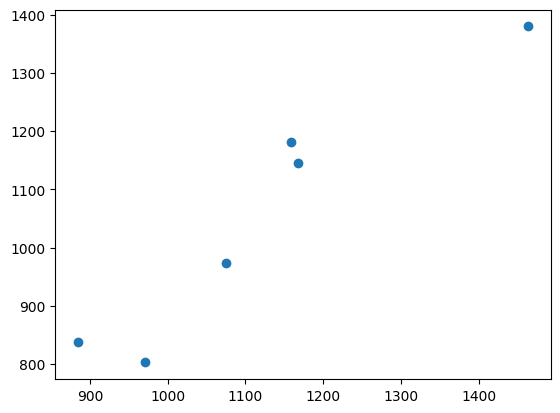

In [46]:
plt.scatter(y_test,y_pred)

In [48]:
residuals = y_test-y_pred
residuals

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64

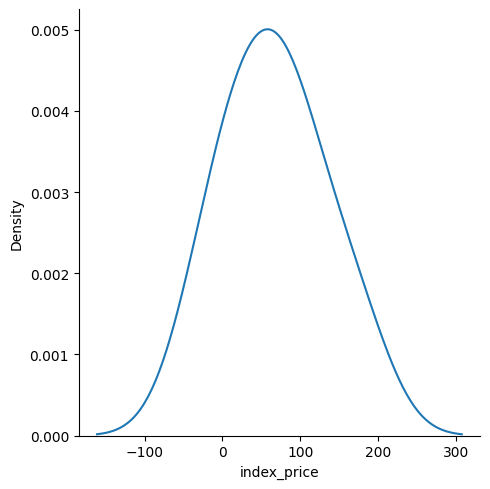

In [50]:
# Plot this residuals

sns.displot(residuals,kind = 'kde')

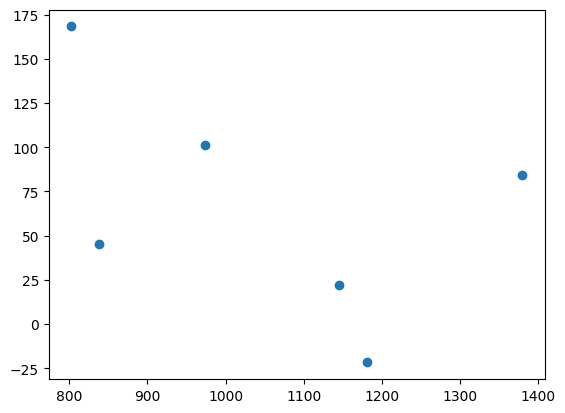

In [51]:
# scatter plot with respect to prediction and residuals 

plt.scatter(y_pred,residuals)

In [56]:
# OLS Linear Regression

import statsmodels.api as sm